In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2
# Allow to pan and zoom graphs & charts
%matplotlib widget

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Overview

**This tutorial will focus on _Linear Regression_**

We will include some additional topics, including: 

* Basic formulation of supervised learning
* Basic linear regression model
* Train/test set split
* Evaluation of regression models

**The lecture relies on the the following proficiencies and tools:**

* [Python](https://www.python.org/) programming
* Vector computations via [the numpy module](https://numpy.org/)
* Data handling using [the pandas module](https://pandas.pydata.org/)
* Plotting using [matplotlib](https://matplotlib.org/)
* Training and using Machine Learning model via [scikit-learn](https://scikit-learn.org/)

You will need them only if you plan to handle these tasks yourself

# Linear Regression

## Our Target Problem

**Let's assume we want to [estimate real-estate prices in Taiwan](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)**

<center><img src="assets/taiwan-tea-house.jpg" style="height: 400px;"></center>


## Loading the Data

**Data for this problem is available (in csv format) from the `data` folder**

In [2]:
!ls data

lr_test.txt  lr_train.txt  real_estate.csv  weather.csv


We will load the data via a Python library, called [pandas](https://pandas.pydata.org/)

In [3]:
data = pd.read_csv('data/real_estate.csv', sep=',')
data.head() # Head returns the first 5 elements

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


* The content of the csv files is a made accessible in a table-like object (`DataFrame`)

## A Look at the Data

**Let's have a better look at the data**

In [4]:
data.head()

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


* The first four columns contain quantities that easy to estimate
* ...But that's not true for the last one!

Obtaining prices required actual houses to be sold and bought

* Our goal is to use the data to _learn a model_
* ...That can estimate the price based on the easily available information

## Input, Output, Examples, Targets

**Formally, we say that**

* All columns except the price represent the _input $x$_ of our model
* The price represetns the _output $y$_ of our model
* Each row in the table represents one data point, i.e. an _example $(\hat{x}_i, \hat{y}_i)$_
  - $\hat{x}_i$ is the input value for the $i$-th example
  - $\hat{y}_i$ is the true output value (or _target_) for the $i$-th example

**Our goal is to learn a model $f$ such that**

* When we feed the input $\hat{x}_i$ of each example to it
* ...The output value $y_i = f(\hat{x}_i)$ is as close as possible to $\hat{y}_i$

This kind of setup is known in ML as _supervised learning_
 

## Supervised Learning and Regression

**Supervised Learning is among the most common forms of ML**

Our _model_ is a function $f(x,; w)$ with input $x$ and _parameters $w$_

* If the output is numeric, we speak of _regression_
* ...And we can define the approximation error over the exampple using, e.g.:

$$
\mathit{MSE}(w) = \sum_{i=1}^m \left(f(x_i,; w) - y_i\right)^2
$$

* "MSE" stands for _Mean Squared Error_ and it's a common error metric

**Training in a (MSE) regression problem consists in solving**

$$
\text{argmin}_w \, \mathit{MSE}(w)
$$


* I.e. choosing the parameters $w$ to minimize approximation error

## Supervised Learning...And Linear Regression

**We speak instead of _Linear Regression_**

...When $f$ is defined as a _linear combination of basis functions_

$$
f(x; w) = \sum_{i=1}^n w_j \phi_j(x)
$$

In our case:

* Each basis function will correspond to _a specific input column_
* I.e. "house age", "distance to MRT", "#stores", "latitude", "longitude"

This is a very common setup in Linear Regression

**Linear regression is one of the simplest supervised learning approaches**

* ...But it is still a very good example!
* ...And will allow us to discuss some of the kay challenges in ML

## Separating Input and Ouput

**First, we separate our input and output**

In [5]:
cols = data.columns
X = data[cols[:-1]] # all columns except the last one
display(X.head())

,house age,dist to MRT,#stores,latitude,longitude
0,14.8,393.2606,6,24.96172,121.53812
1,17.4,6488.0210,1,24.95719,121.47353
2,16.0,4066.5870,0,24.94297,121.50342
3,30.9,6396.2830,1,24.94375,121.47883
4,16.5,4082.0150,0,24.94155,121.50381


**We will focus on predicting the logarithm of the price per area**

In [6]:
y = np.log(data[cols[-1]]) # just the last column

* In practice, it's like predicting the order of magnitude

## Training and Test Set

**The model we learn should work well on _all relevant data_**

Formally, the model should _generalize_ well

* How do we check whether this is the case?
* A typical approach: partitioning our dataset

**The basic idea is to separe our data in two groups**

* The first group will actually be used for training
  - This will be called the _training set_
* The second group will be used only _for model evaluation_
  - This will be called the _test set_ (or _holdout set_)

With this trick, we can assess our model performance on _unseen data_

## Training and Test Set

**When we partition the data, we need to be careful with sorted datasets**

Let's plot the values of all attributes for each example in the dataset

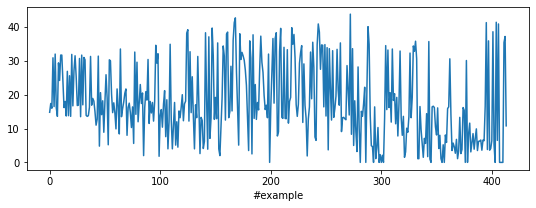

In [7]:
plt.figure(figsize=(9, 3))
data['house age'].plot(xlabel='#example');

* Examples do not appear to be sorted by "house age"

## Training and Test Set

**When we partition the data, we need to be careful with sorted datasets**

Let's plot the values of all attributes for each example in the dataset

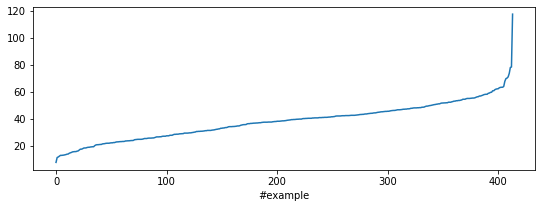

In [8]:
plt.figure(figsize=(9, 3))
data['price per area'].plot(xlabel='#example');

* ...But they _are sorted_ by "price per area"!

## Training and Test Set

**If we simply split our data in two groups**

* We will train our model only on low prices
* ...And evaluate its performance only on higher prices

If we do hit, the model will _generalize poorly_

**For most ML methods to work there is a basic requirement**

> **The training data should be _representative of the true population_**

* It means that the training data should be similar
* ...To the data to which we will actually apply our model

**How do we achieve this with a single dataset?**

## Training and Test Set

**The solution is to _shuffle the data_ before partitioning**

In scikit-learn, we can use a single function for both steps:

In [9]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.34, random_state=42)

print(f'Size of the training set: {len(X_tr)}')
print(f'Size of the test set: {len(X_ts)}')

Size of the training set: 273
Size of the test set: 141


The function `train_test_split`

* Randomly shuffles the data (optionally with a fixed seed `random_state`)
* Puts a fraction `test_size` of the data in the test set
* ...And the remaining data in the training set
* Both the input and the output data is processed in this fashion

## Training and Test Set

**Using separate test set is _extremely important_**

...Because we want our model to work on _new data_

* We have no use for a model that _learns the input data perfectly_
* ...But that _behaves poorly on unseen data_
* In these cases, we say that the model _does not generalize_

By keeping a separate test set we can simulate this evaluation

**For the best performance...**

...Training and test data should have similar probability distributions

* Informally, they should be relatively similar
* In this case, we say that the training set is _representative_

## Fitting the Model

**We can now train a linear model using the [scikit-learn library](https://scikit-learn.org/stable/)**

In [10]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(X_tr, y_tr)

LinearRegression()

We obtain the estimated output via the `predict` method:

In [11]:
y_pred_tr = m.predict(X_tr)
y_pred_ts = m.predict(X_ts)

* The predictions (unlike the targets) are not guaranteed to be integers
* ...But that is still fine, since it's easy to interpret them

## Evaluation

**Finally, we need to evaluate the prediction quality**

A common approach is using metrics. Here are a few examples:

* The _Mean Absolute Error_ is given by:
$$
\mathit{MAE} = \frac{1}{m}\sum_{i=1}^m \left|f(x_i) - y_i\right|
$$
* The _Root Mean Squared Error_ is given by:
$$
\mathit{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^m (f(x_i) - y_i)^2}
$$

Both the RMSE and MAE a simple error measures

* They are expresses in the same unit as the original variable

## Evaluation


* The coefficient of determination ($R^2$ coefficient) is given by:
$$
R^2 = 1 - \frac{\sum_{i=1}^m (f(x_i) - y_i)^2}{\sum_{i=1}^m (y_i - \tilde{y})^2}
$$
where $\tilde{y}$ is the average of the $y$ values

**The coefficient of determination is a useful, but more complex metric:**

* Its maximum is 1: an $R^2 = 1$ implies perfect predictions
* Having a known maximum make the metric very readable
* It can be arbitrarily low (including negative)
* It can be subject to a lot of noise if the targets $y$ have low variance

**Using the MSE directly for evaluation is usually a bad idea**

...Since it is a square, and therefore not easy to parse for a human

## Evaluation

**Let's see the values for our example**

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'MAE on the training data: {mean_absolute_error(y_tr, y_pred_tr):.3}')
print(f'MAE on the test data: {mean_absolute_error(y_ts, y_pred_ts):.3}')
print(f'RMSE on the training data: {np.sqrt(mean_squared_error(y_tr, y_pred_tr)):.3}')
print(f'RMSE on the test data: {np.sqrt(mean_squared_error(y_ts, y_pred_ts)):.3}')
print(f'R2 on the training data: {r2_score(y_tr, y_pred_tr):.3}')
print(f'R2 on the test data: {r2_score(y_ts, y_pred_ts):.3}')

MAE on the training data: 0.143
MAE on the test data: 0.177
RMSE on the training data: 0.207
RMSE on the test data: 0.253
R2 on the training data: 0.691
R2 on the test data: 0.645


* In general, we have better predictions on the training set than on the test set
* This is symptomatic of some _overfitting_
* I.e. we are learning patterns that don't translate to unseen data

Later on, we will see some techniques to deal with this situation

## Evaluation

**As an (important!) alternative to metrics, we can use _scatter plots_:**

* On the x-axis, we show the target values
* On the y-axis, we show the predictions

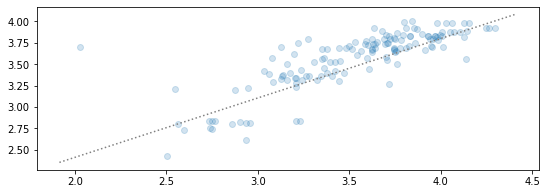

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(9,3))
plt.scatter(y_ts, y_pred_ts, alpha=0.2)
plt.plot(plt.xlim(), plt.ylim(), linestyle=':', color='0.5');

This gives us a better idea of which kind of mistakes the model is making

## Conclusions and Take-Home Messages

* Basic formulation of _supervised learning_
  - I.e. _learning a model_ from available examples
  - ...When the examples contain values for _both the input and the output_
* Basic linear regression model
  - One the _simplest approaches_ for supervised learning
  - I.e. the output is a _linear combination_ of the input values
  - Regression = we estimate a numeric quantity
* Train/test set split
  - Needed to evaluate our model on _unseen data_ (generalization)
* Evaluation of regression models
  - Make sure to compare the performance on _both training and test data_  
  - _Metrics_ (e.g. RMSE, MAE) provide a compact evaluation
  - _Scatter plot_ for a more fine-grained evaluation